# **0. Mounts (Case of using Colaboratory) and Import modules**

In [1]:
# import os
# import shutil
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# os.getcwd()

'/content'

In [ ]:
# os.chdir('/content/drive/MyDrive/AIhack_TH2023/00_Prepare')
# !ls

answer.csv  Explanation.gslides  Titanic_example.gsheet
AUC.gsheet  sample.ipynb	 titanic.zip
Data	    test.csv		 train.csv


# **1. Import data**

**Data list**
- train.csv (This dataset has Survived information)
- test.csv (This dataset hasn't Survived information)
- answer.csv (This dataset has Survived information of test.csv)

<br>

**Check the following**:

(1) *train.csv*  **has** Survived column

(2) *test.csv*  **hasn't** Survived column

(3) *answer.csv*  **has** Survived column

In [ ]:
import pandas as pd

In [ ]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")
answer_data = pd.read_csv("answer.csv")

### train data

In [ ]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
train_data.shape # Number of rows and columns

(722, 12)

### Definitions of column
| Variable | Definition | Key |
| :-- | :-- | :- |
| survival | Survival | 0 = No, 1 = Yes |
| pclass | Ticket class | 1 = 1st, 2 = 2nd, 3 = 3rd (1st = Upper, 2nd = Middle, 3rd = Lower) |
| sex | Sex |  |
| Age | Age in years |  |
| sibsp | # of siblings / spouses aboard the Titanic |  |
| parch | # of parents / children aboard the Titanic |  |
| ticket | Ticket number |  |
| fare | Passenger fare |  |
| cabin | Cabin number |  |
| embarked | Port of Embarkation | C = Cherbourg, Q = Queenstown, S = Southampton |

### test data

In [ ]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,723,2,"Gillespie, Mr. William Henry",male,34.0,0,0,12233,13.0000,NaN,S
1,724,2,"Hodges, Mr. Henry Price",male,50.0,0,0,250643,13.0000,NaN,S
2,725,1,"Chambers, Mr. Norman Campbell",male,27.0,1,0,113806,53.1000,E8,S
3,726,3,"Oreskovic, Mr. Luka",male,20.0,0,0,315094,8.6625,NaN,S
4,727,2,"Renouf, Mrs. Peter Henry (Lillian Jefferys)",female,30.0,3,0,31027,21.0000,NaN,S


In [ ]:
test_data.shape # Number of rows and columns

(169, 11)

### answer_data

In [ ]:
answer_data.head()

,PassengerId,Survived
0,723,0
1,724,0
2,725,1
3,726,0
4,727,1


In [ ]:
answer_data.shape # Number of rows and columns

(169, 2)

# **2. Merge**

In [ ]:
# Set Flag
train_data["train_flag"] = 1
test_data["train_flag"] = 0
test_data["Survived"] = -99 # temporary

# merge
data = pd.concat([train_data, test_data], axis = 0)

In [ ]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train_flag
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


In [ ]:
data.shape

(891, 13)

# **3. Seeing data**

In [ ]:
# check columns
pd.DataFrame(data.columns)

,0
0,PassengerId
1,Survived
2,Pclass
3,Name
4,Sex
5,Age
6,SibSp
7,Parch
8,Ticket
9,Fare


In [ ]:
# check type of columns
pd.DataFrame(data.dtypes)
# another function -> data.info()

,0
PassengerId,int64
Survived,int64
Pclass,int64
Name,object
Sex,object
Age,float64
SibSp,int64
Parch,int64
Ticket,object
Fare,float64


In [ ]:
# check to int and float data
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,train_flag
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,-18.461279,2.308642,29.699118,0.523008,0.381594,32.204208,0.810325
std,257.353842,38.989791,0.836071,14.526497,1.102743,0.806057,49.693429,0.392264
min,1.000000,-99.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,1.000000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,1.000000
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,1.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000


# **4. Make a model (A very simple example)**

In [ ]:
# conversion to dummy data about "Sex" and "Embarked" colmuns
# If you want more information, look up "get_dummies()" in the google engine.
data = pd.get_dummies(data, columns=['Sex', 'Embarked'])

In [ ]:
data

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,train_flag,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,1,0,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,1,1,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,1,1,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,1,1,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164,887,0,2,"Montvila, Rev. Juozas",27.0,0,0,211536,13.0000,NaN,0,0,1,0,0,1
165,888,0,1,"Graham, Miss. Margaret Edith",19.0,0,0,112053,30.0000,B42,0,1,0,0,0,1
166,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",NaN,1,2,W./C. 6607,23.4500,NaN,0,1,0,0,0,1
167,890,0,1,"Behr, Mr. Karl Howell",26.0,0,0,111369,30.0000,C148,0,0,1,1,0,0


In [ ]:
from sklearn.model_selection import train_test_split

# Split into train_data and test_data.
train_data = data[data["train_flag"] == 1]
test_data = data[data["train_flag"] == 0]

# Stores variables(= Feature value) used for making AI (Feel free to choose!)
cols = ["Fare", "Sex_female", "Embarked_C", "Embarked_Q", "Embarked_S"]

# Separation of feature values and Survived
df_x = train_data[cols]
df_y = train_data['Survived']

# Split for training / validation
# If you want more information, look up "train_test_split()" in the google engine.
train_x, val_x, train_y, val_y = train_test_split(df_x, df_y, test_size=0.2)

In [ ]:
# check of data size
print(train_x.shape)
print(val_x.shape)
print(train_y.shape)
print(val_y.shape)

(577, 5)
(145, 5)
(577,)
(145,)


In [ ]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_x, train_y)

LogisticRegression()

In [ ]:
# predict(to Train)
y_train_pred = lr.predict_proba(train_x)

# predict(to val)
y_val_pred = lr.predict_proba(val_x)

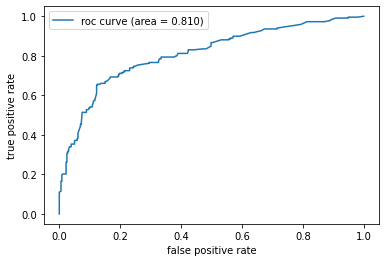

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# AUC (Train)
y_train_pred = lr.predict_proba(train_x)[:, 1]
fpr, tpr, thresholds = roc_curve(y_true = train_y, y_score = y_train_pred)

plt.plot(fpr, tpr, label='roc curve (area = %0.3f)' % auc(fpr, tpr))
plt.legend()
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.show()

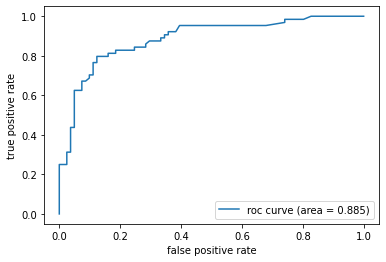

In [ ]:
# AUC (Val)
y_val_pred = lr.predict_proba(val_x)[:, 1]
fpr, tpr, thresholds = roc_curve(y_true = val_y, y_score = y_val_pred)

plt.plot(fpr, tpr, label='roc curve (area = %0.3f)' % auc(fpr, tpr))
plt.legend()
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.show()

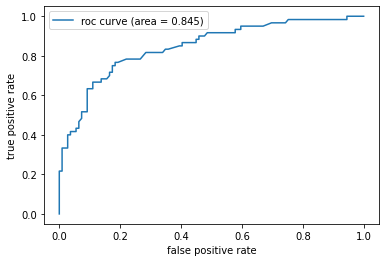

In [ ]:
test_x = test_data[cols]
test_y = answer_data['Survived']

# AUC(test data)
y_test_pred = lr.predict_proba(test_x)[:, 1]
fpr, tpr, thresholds = roc_curve(y_true = test_y, y_score = y_test_pred)

plt.plot(fpr, tpr, label='roc curve (area = %0.3f)' % auc(fpr, tpr))
plt.legend()
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.show()